<a href="https://colab.research.google.com/github/nahbos/AUT-Fundamental-Statistical-Learning/blob/main/HW02/Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sobhan Moradian Daghigh

- 12-23-2022

### Ex02 - Q5

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import random
from scipy.stats import norm
from tqdm.notebook import tqdm
import pandas as pd
import math

## a.

In [3]:
X = norm.rvs(loc=5, scale=1, size=100)
X

array([4.49810058, 3.24133675, 4.92380737, 3.51505491, 2.93609304,
       5.0116336 , 5.06617968, 4.22187681, 4.7553135 , 4.11107691,
       5.03623824, 5.67278713, 5.06589661, 6.45364311, 4.28861905,
       4.92668351, 5.99983893, 4.33735979, 5.45595909, 4.73452598,
       5.81224333, 6.08590303, 6.14267838, 5.06582679, 5.29213372,
       5.29938655, 4.31202338, 5.60792773, 5.01181184, 4.53594081,
       5.0556028 , 5.47166782, 5.23878233, 4.97071093, 6.03959278,
       5.63804266, 5.66456617, 2.86050679, 3.85583682, 4.7549662 ,
       4.26636062, 7.02921857, 5.26055638, 4.1347428 , 5.81896396,
       3.88612624, 4.24558361, 6.43755166, 4.85660043, 5.83471598,
       6.94463601, 4.25554772, 6.43637603, 7.36611699, 2.68676032,
       3.0683171 , 5.50494733, 5.8308268 , 5.539213  , 4.65282613,
       5.66590106, 6.96155545, 4.85158527, 6.01034975, 4.7515523 ,
       4.51337131, 5.34122896, 5.06987184, 5.0478709 , 3.98981776,
       4.27977492, 4.80385077, 5.38365684, 6.41738931, 6.51194

## b.

In [5]:
theta_hat = np.exp(X.mean())

B = 1000000
t_boot_nonparam = np.empty(B)
n = len(X)
for i in tqdm(range(B)):
    xx = np.random.choice(X, n, replace=True)
    t_boot_nonparam[i] = np.exp(xx.mean())
    
se_boot = t_boot_nonparam.std()

alpha = 0.06
z = norm.ppf(1 - alpha/2)
normal_conf = (theta_hat - z * se_boot, theta_hat + z * se_boot)

print('|_ 94%% confidence interval: \t (%.3f, %.3f)' % normal_conf)

  0%|          | 0/1000000 [00:00<?, ?it/s]

|_ 94% confidence interval: 	 (115.287, 168.321)



## c.

In [6]:
bins = np.linspace(50, 250, 500)

In [7]:
def theta_cdf(x):
    return norm.cdf(np.log(x), loc=5, scale=1/50)

In [8]:
theta_cdf_bins = list(map(theta_cdf, bins))
theta_cdf_bins_delta = np.empty(len(bins))
theta_cdf_bins_delta[0] = 0
theta_cdf_bins_delta[1:] = np.diff(theta_cdf_bins)

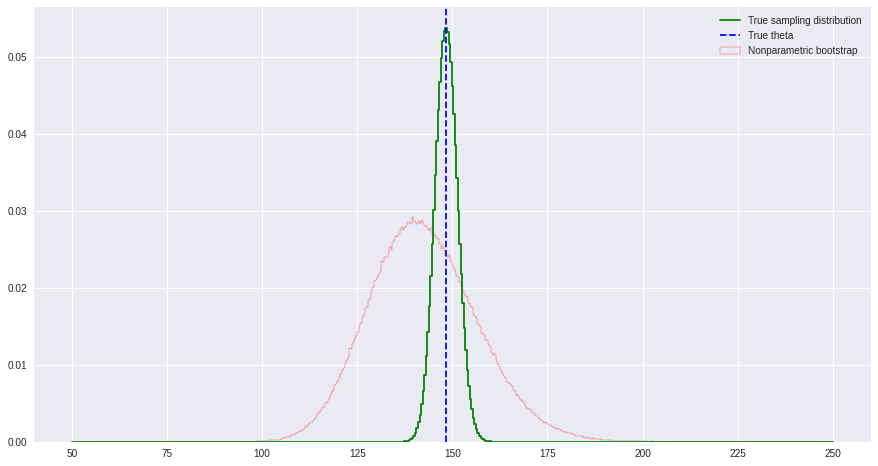

In [22]:
with plt.style.context('seaborn'):
  plt.figure(figsize=(15, 8))
  plt.hist(t_boot_nonparam, bins, label='Nonparametric bootstrap', color='red', histtype='step', density=True)
  plt.step(bins, theta_cdf_bins_delta, color='green', label='True sampling distribution')
  plt.axvline(x=np.exp(5), color='blue', label='True theta', linestyle='dashed')
  plt.legend()
  plt.show()

Finito